In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

from rouge import Rouge #git clone https://github.com/pltrdy/rouge
rouge = Rouge()

In [1]:
path = '/home/amkabatznick/w266-final-project/data/processed/amazon/Sports_Outdoors/txt/'

In [6]:
#Creates Empty Dataframe
sentence_data = pd.DataFrame()

#Loops through all files in the path
for filename in os.listdir(path):
    f = open(path+filename, 'r')
    content = f.read()
    #For each file split out the summary setences from the rest of the document
    summary_sentences = content.split('@highlight')
    #Split the summary sentences
    sent_1, sent_2, sent_3 = [sent.replace('\n\n','') for sent in summary_sentences[1:]]
    #Run ROUGUE Analysis on the Various Summary Setences
    r1 = rouge.get_scores(sent_1,sent_2)[0]['rouge-l']['f']
    r2 = rouge.get_scores(sent_1,sent_3)[0]['rouge-l']['f']
    r3 = rouge.get_scores(sent_2,sent_3)[0]['rouge-l']['f']
    
    #Adds this information to the dataframe
    sentence_data = sentence_data.append(pd.DataFrame(data=[[filename,sent_1,sent_2,r1],
                                                            [filename,sent_1,sent_3,r2],
                                                            [filename,sent_2,sent_3,r3]],
                                                      columns=['file_name','sentence_1','sentence_2','f_score']),
                                        ignore_index=True)

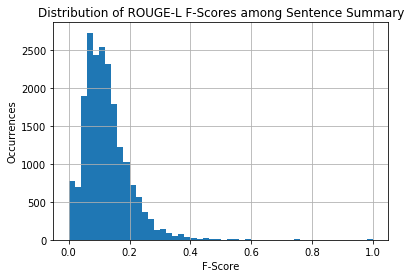

In [7]:
ax = sentence_data.f_score.hist(bins=50)
_ = ax.set_xlabel('F-Score')
_ = ax.set_ylabel('Occurrences')
_ = ax.set_title('Distribution of ROUGE-L F-Scores among Sentence Summary')